Trabajo Final  
Benjamin Osvaldo Alvirde Melendez  
Modulo 4  
Diplomado de Introducción a la Ciencia de Datos para las Ciencias Sociales
Título: Prevalencia de distintas causas de mortalidad por nivel de marginación en México

El lugar en el estatus social que ocupan las personas afecta su nivel de exposición a factores nocivos para su salud y su vulnerabilidad para enfermar. Por lo que las desigualdades sociales influyen en los procesos de enfermedad y mortalidad. Este proyecto se propone investigar la relación existente entre las condiciones socioeconómicas que prevalecen en México y la desigualdad en la intensidad de la mortalidad.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)
from pandas.plotting import scatter_matrix
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
mortalidad_2022 = pd.read_csv('C:/Users/balvi/Desktop/Data Science/Trabajofinal/conjunto_de_datos_defunciones_registradas_2022.CSV', 
                      encoding = 'latin1')

mortalidad_2022.head()

,ent_regis,mun_regis,tloc_regis,loc_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,tloc_ocurr,loc_ocurr,causa_def,cod_adicio,lista_mex,sexo,ent_nac,afromex,conindig,lengua,cve_lengua,nacionalid,nacesp_cve,edad,sem_gest,gramos,dia_ocurr,mes_ocurr,anio_ocur,dia_regis,mes_regis,anio_regis,dia_nacim,mes_nacim,anio_nacim,cond_act,ocupacion,escolarida,edo_civil,tipo_defun,ocurr_trab,lugar_ocur,par_agre,asist_medi,cirugia,natviole,necropsia,usonecrops,encefalica,donador,sitio_ocur,cond_cert,derechohab,embarazo,rel_emba,horas,minutos,capitulo,grupo,lista1,gr_lismex,area_ur,edad_agru,complicaro,dia_cert,mes_cert,anio_cert,maternas,ent_ocules,mun_ocules,loc_ocules,razon_m,id_inegi,dis_re_oax
0,1,1,15,1,1,1,15,1,1,1,15,1,K254,NaN,35D,2,888,8,8,2,8888,1,998,4089,88,8888,15,12,2021,5,1,2022,20,2,1932,2,110,3,3,4,8,88,88,1,8,8,2,8,8,8,11,1,2,9,9,7,30,11,2,79.0,35,1,22,9,15,12,2021,NaN,88,888,8888,0,1001000241,999
1,1,1,15,1,1,1,15,1,1,1,15,1,J439,NaN,33D,2,888,8,8,9,8888,1,998,4090,88,8888,15,2,2016,31,1,2022,29,6,1925,2,110,1,9,4,8,88,88,1,8,8,2,8,8,8,12,3,2,9,9,19,50,10,5,76.0,33,1,23,9,99,1,2022,NaN,88,888,8888,0,1001000242,999
2,1,1,15,1,1,1,15,1,1,1,15,1,E112,NaN,20D,1,888,8,8,2,8888,1,998,4085,88,8888,27,11,2016,2,2,2022,15,1,1931,1,72,1,3,4,8,88,88,1,8,8,9,8,8,8,3,3,2,8,8,12,0,4,2,52.0,20,1,22,8,99,2,2022,NaN,88,888,8888,0,1001001025,999
3,1,1,15,1,1,1,15,1,1,1,15,1,I269,NaN,29A,1,888,8,8,2,8888,1,998,4087,88,8888,22,10,2014,2,2,2022,9,10,1927,1,73,3,3,4,8,88,88,1,8,8,2,8,8,8,4,1,99,8,8,8,20,9,5,68.0,29,1,22,8,99,2,2022,NaN,88,888,8888,0,1001001026,999
4,1,1,15,1,1,1,15,1,1,1,15,1,W104,S061,50,1,888,8,8,2,8888,1,998,4065,88,8888,8,11,2012,14,2,2022,8,7,1947,1,83,6,5,1,2,4,88,1,8,8,2,8,8,8,9,1,7,8,8,23,50,20,13,97.0,E50,1,18,8,99,2,2022,NaN,1,1,1,0,1001001027,999


Se plantea como fuente de información las Estadísticas de Defunciones Registradas (EDR). Ya que del INEGI (2023) comenta que estas estadísticas permiten conocer y comparar el volumen, tendencias y características de la mortalidad en los diferentes ámbitos geográficos del país. Estas estadísticas proporcionan información para el análisis y evaluación de acciones dirigidas a la elaboración de programas de salud pública, para controlar enfermedades infecciosas y epidemiológicas, prevención de accidentes y en el estudio de diferencias de la mortalidad por edad, sexo y causa básica de la defunción.

In [3]:
entidad = pd.read_csv('C:/Users/balvi/Desktop/Data Science/Trabajofinal/catalogo_estado.csv', 
                      encoding = 'latin1')

entidad.head()

,ent_regis,dc_estado
0,1,Aguascalientes
1,2,Baja California
2,3,Baja California Sur
3,4,Campeche
4,5,Coahuila


In [4]:
mortalidad_2022=pd.merge(mortalidad_2022,entidad )

In [5]:
mortalidad_2022.head()

,ent_regis,mun_regis,tloc_regis,loc_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,tloc_ocurr,loc_ocurr,causa_def,cod_adicio,lista_mex,sexo,ent_nac,afromex,conindig,lengua,cve_lengua,nacionalid,nacesp_cve,edad,sem_gest,gramos,dia_ocurr,mes_ocurr,anio_ocur,dia_regis,mes_regis,anio_regis,dia_nacim,mes_nacim,anio_nacim,cond_act,ocupacion,escolarida,edo_civil,tipo_defun,ocurr_trab,lugar_ocur,par_agre,asist_medi,cirugia,natviole,necropsia,usonecrops,encefalica,donador,sitio_ocur,cond_cert,derechohab,embarazo,rel_emba,horas,minutos,capitulo,grupo,lista1,gr_lismex,area_ur,edad_agru,complicaro,dia_cert,mes_cert,anio_cert,maternas,ent_ocules,mun_ocules,loc_ocules,razon_m,id_inegi,dis_re_oax,dc_estado
0,1,1,15,1,1,1,15,1,1,1,15,1,K254,NaN,35D,2,888,8,8,2,8888,1,998,4089,88,8888,15,12,2021,5,1,2022,20,2,1932,2,110,3,3,4,8,88,88,1,8,8,2,8,8,8,11,1,2,9,9,7,30,11,2,79.0,35,1,22,9,15,12,2021,NaN,88,888,8888,0,1001000241,999,Aguascalientes
1,1,1,15,1,1,1,15,1,1,1,15,1,J439,NaN,33D,2,888,8,8,9,8888,1,998,4090,88,8888,15,2,2016,31,1,2022,29,6,1925,2,110,1,9,4,8,88,88,1,8,8,2,8,8,8,12,3,2,9,9,19,50,10,5,76.0,33,1,23,9,99,1,2022,NaN,88,888,8888,0,1001000242,999,Aguascalientes
2,1,1,15,1,1,1,15,1,1,1,15,1,E112,NaN,20D,1,888,8,8,2,8888,1,998,4085,88,8888,27,11,2016,2,2,2022,15,1,1931,1,72,1,3,4,8,88,88,1,8,8,9,8,8,8,3,3,2,8,8,12,0,4,2,52.0,20,1,22,8,99,2,2022,NaN,88,888,8888,0,1001001025,999,Aguascalientes
3,1,1,15,1,1,1,15,1,1,1,15,1,I269,NaN,29A,1,888,8,8,2,8888,1,998,4087,88,8888,22,10,2014,2,2,2022,9,10,1927,1,73,3,3,4,8,88,88,1,8,8,2,8,8,8,4,1,99,8,8,8,20,9,5,68.0,29,1,22,8,99,2,2022,NaN,88,888,8888,0,1001001026,999,Aguascalientes
4,1,1,15,1,1,1,15,1,1,1,15,1,W104,S061,50,1,888,8,8,2,8888,1,998,4065,88,8888,8,11,2012,14,2,2022,8,7,1947,1,83,6,5,1,2,4,88,1,8,8,2,8,8,8,9,1,7,8,8,23,50,20,13,97.0,E50,1,18,8,99,2,2022,NaN,1,1,1,0,1001001027,999,Aguascalientes


In [6]:
causa_muerte = pd.read_csv('C:/Users/balvi/Desktop/Data Science/Trabajofinal/catalogo_causas_muerte.csv', 
                      encoding = 'latin1')

causa_muerte.head()

,lista_mex,DESCRIP,Causa
0,1,Enfermedades infecciosas intestinales,Enfermedades infecciosas intestinales
1,01A,C??lera,Enfermedades infecciosas intestinales
2,01B,Fiebre tifoidea,Enfermedades infecciosas intestinales
3,01C,Fiebre paratifoidea,Enfermedades infecciosas intestinales
4,01D,Shigelosis,Enfermedades infecciosas intestinales


In [7]:
mortalidad_2022=pd.merge(mortalidad_2022, causa_muerte )


In [8]:
mortalidad_2022.head()

,ent_regis,mun_regis,tloc_regis,loc_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,tloc_ocurr,loc_ocurr,causa_def,cod_adicio,lista_mex,sexo,ent_nac,afromex,conindig,lengua,cve_lengua,nacionalid,nacesp_cve,edad,sem_gest,gramos,dia_ocurr,mes_ocurr,anio_ocur,dia_regis,mes_regis,anio_regis,dia_nacim,mes_nacim,anio_nacim,cond_act,ocupacion,escolarida,edo_civil,tipo_defun,ocurr_trab,lugar_ocur,par_agre,asist_medi,cirugia,natviole,necropsia,usonecrops,encefalica,donador,sitio_ocur,cond_cert,derechohab,embarazo,rel_emba,horas,minutos,capitulo,grupo,lista1,gr_lismex,area_ur,edad_agru,complicaro,dia_cert,mes_cert,anio_cert,maternas,ent_ocules,mun_ocules,loc_ocules,razon_m,id_inegi,dis_re_oax,dc_estado,DESCRIP,Causa
0,1,1,15,1,1,1,15,1,1,1,15,1,K254,NaN,35D,2,888,8,8,2,8888,1,998,4089,88,8888,15,12,2021,5,1,2022,20,2,1932,2,110,3,3,4,8,88,88,1,8,8,2,8,8,8,11,1,2,9,9,7,30,11,2,79.0,35,1,22,9,15,12,2021,NaN,88,888,8888,0,1001000241,999,Aguascalientes,Ulceras g?­strica y duodenal,Enfermedades digestivas
1,1,8,5,1,1,7,1,7777,1,7,1,7777,K255,NaN,35D,2,14,8,8,2,8888,1,998,4084,88,8888,14,12,2021,3,1,2022,13,3,1937,2,110,1,3,4,8,88,88,1,8,8,2,8,8,8,11,3,7,9,9,13,0,11,2,79.0,35,2,21,9,14,12,2021,NaN,88,888,8888,0,1008000161,999,Aguascalientes,Ulceras g?­strica y duodenal,Enfermedades digestivas
2,1,1,15,1,14,64,2,48,1,5,11,1,K274,NaN,35D,2,1,8,8,2,8888,1,998,4082,88,8888,26,12,2021,12,1,2022,25,12,1939,2,110,4,5,4,8,88,88,1,8,8,9,8,8,8,11,3,99,9,9,18,0,11,2,79.0,35,2,21,9,26,12,2021,NaN,88,888,8888,0,1001000725,999,Aguascalientes,Ulceras g?­strica y duodenal,Enfermedades digestivas
3,1,1,15,1,1,1,5,479,1,1,15,1,K255,NaN,35D,1,14,8,8,9,8888,1,998,4074,88,8888,2,1,2022,10,1,2022,2,7,1947,2,110,99,5,4,8,88,88,1,8,8,2,8,8,8,3,3,2,8,8,14,22,11,2,79.0,35,1,19,8,2,1,2022,NaN,88,888,8888,0,1001000680,999,Aguascalientes,Ulceras g?­strica y duodenal,Enfermedades digestivas
4,1,1,15,1,14,91,8,1,1,1,15,1,K254,NaN,35D,1,14,8,8,2,8888,1,998,4077,88,8888,22,12,2021,5,1,2022,19,9,1944,2,110,3,5,4,8,88,88,1,8,8,2,8,8,8,9,1,1,8,8,6,55,11,2,79.0,35,1,20,8,22,12,2021,NaN,88,888,8888,0,1001000289,999,Aguascalientes,Ulceras g?­strica y duodenal,Enfermedades digestivas


In [9]:
mortalidad_2022['dc_estado'].value_counts()

dc_estado
EDOMEX                 88425
CDMX                   77071
Veracruz               59130
Jalisco                54498
Puebla                 43194
Guanajuato             41543
Nuevo Leon             37155
Michoacan              31430
Chiapas                31036
Oaxaca                 28510
Chihuahua              27656
Baja California        25616
Tamaulipas             21574
Sonora                 21137
Coahuila               20103
San Luis Potosi        19486
Guerrero               19432
Hidalgo                17327
Sinaloa                16861
Morelos                15210
Tabasco                14914
Yucatan                14853
Queretaro              12957
Zacatecas              11690
Durango                10846
Quintana Roo            8459
Aguascalientes          7648
Tlaxcala                7569
Nayarit                 7506
Colima                  5788
Campeche                5260
Baja California Sur     3947
Name: count, dtype: int64

In [10]:
mortalidad_2022['Causa'].value_counts()

Causa
Enfermedades cardiacas                   199414
Diabetes mellitus                        115025
Enfermedades digestivas                   74631
Infecciones respiratorias                 65874
Otras enfermedades                        50078
Homicidio                                 39240
Enfermedades cerebrovasculares            35977
Tumores malignos digestivos               29399
Otros tumores                             23292
Tumores malignos genitourinarios          21691
Otros accidentes                          21036
Accidentes de transporte                  16414
Enfermedades del sistema nervioso         13763
Causas obstetricas                        11083
Enfermedad metabolica                     11054
Tumores malignos linfaticos                9043
Suicidios                                  8253
Malformaciones congenitas                  7958
Tumores malignos respiratorios             7347
Enfermedad bacteriana                      7330
Desnutricion                      

Se agrega la información a nivel estatal

In [11]:
mortalidad_geo=mortalidad_2022.pivot_table(index = "Causa", columns = "dc_estado", values = "id_inegi", aggfunc = "count")

In [12]:
mortalidad_geo

dc_estado,Aguascalientes,Baja California,Baja California Sur,CDMX,Campeche,Chiapas,Chihuahua,Coahuila,Colima,Durango,EDOMEX,Guanajuato,Guerrero,Hidalgo,Jalisco,Michoacan,Morelos,Nayarit,Nuevo Leon,Oaxaca,Puebla,Queretaro,Quintana Roo,San Luis Potosi,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz,Yucatan,Zacatecas
Causa,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Accidentes de transporte,266,190,131,626,170,671,896,436,187,378,758,823,450,473,1292,884,345,320,696,561,719,425,212,594,623,557,577,592,252,521,362,427
Causas obstetricas,127,271,60,889,78,671,431,357,53,231,1282,481,341,256,696,442,134,104,455,330,643,202,131,235,235,211,266,357,111,753,158,92
Desnutricion,117,94,32,132,44,280,132,174,23,45,647,385,195,159,420,276,172,95,210,654,495,99,63,231,99,111,113,130,71,762,64,160
Diabetes mellitus,916,2571,387,10237,744,4639,2890,3040,675,1199,17021,6422,3340,2467,5906,4643,2204,846,4030,4477,7663,1433,1081,2658,1687,1642,2812,3107,1313,10320,1393,1262
Enfermedad bacteriana,67,336,42,876,42,212,302,176,61,97,730,281,141,171,621,214,110,87,286,123,305,149,87,182,202,332,95,229,53,474,171,76
Enfermedad metabolica,183,303,48,1273,53,311,443,302,46,146,1274,454,301,255,889,452,242,98,394,417,474,207,99,259,212,241,176,260,115,744,140,243
Enfermedades cardiacas,1521,5311,957,18404,1279,7561,6618,5265,1016,3379,20613,10681,4485,4654,12373,7532,3817,1597,10003,6821,11677,2850,1492,5284,4482,5357,3942,5819,1998,15957,4084,2585
Enfermedades cerebrovasculares,345,1150,192,3518,220,1175,1069,886,233,401,3615,1497,869,938,2399,1339,574,300,1978,1667,1967,630,365,826,735,832,623,931,321,3070,859,453
Enfermedades circulatorias,54,108,24,611,13,108,208,98,23,45,433,179,70,85,417,187,52,31,166,134,164,137,31,90,86,117,52,85,34,263,61,74


Para manejarlo en términos porcentuales se divide el número de muertes por cada causa entre el total por entidad

In [13]:
mortalidad_geo['Aguascalientes']=(mortalidad_geo['Aguascalientes']/7648)

In [14]:
mortalidad_geo['EDOMEX']=(mortalidad_geo['EDOMEX']/88420)

In [15]:
mortalidad_geo['CDMX']=(mortalidad_geo['CDMX']/77067)

In [16]:
mortalidad_geo['Veracruz']=(mortalidad_geo['Veracruz']/59130)

In [17]:
mortalidad_geo['Jalisco']=(mortalidad_geo['Jalisco']/54498)

In [18]:
mortalidad_geo['Puebla']=(mortalidad_geo['Puebla']/43194)

In [19]:
mortalidad_geo['Guanajuato']=(mortalidad_geo['Guanajuato']/41543)

In [20]:
mortalidad_geo['Nuevo Leon']=(mortalidad_geo['Nuevo Leon']/37155)

In [21]:
mortalidad_geo['Michoacan']=(mortalidad_geo['Michoacan']/31430)

In [22]:
mortalidad_geo['Chiapas']=(mortalidad_geo['Chiapas']/31036)

In [23]:
mortalidad_geo['Oaxaca']=(mortalidad_geo['Oaxaca']/28510)

In [24]:
mortalidad_geo['Chihuahua']=(mortalidad_geo['Chihuahua']/27656)

In [25]:
mortalidad_geo['Baja California']=(mortalidad_geo['Baja California']/25616)

In [26]:
mortalidad_geo['Tamaulipas']=(mortalidad_geo['Tamaulipas']/21574)

In [27]:
mortalidad_geo['Sonora']=(mortalidad_geo['Sonora']/21137)

In [28]:
mortalidad_geo['Coahuila']=(mortalidad_geo['Coahuila']/20103)

In [29]:
mortalidad_geo['San Luis Potosi']=(mortalidad_geo['San Luis Potosi']/19486)

In [30]:
mortalidad_geo['Guerrero']=(mortalidad_geo['Guerrero']/19432)

In [31]:
mortalidad_geo['Hidalgo']=(mortalidad_geo['Hidalgo']/17327)

In [32]:
mortalidad_geo['Sinaloa']=(mortalidad_geo['Sinaloa']/16861)

In [33]:
mortalidad_geo['Morelos']=(mortalidad_geo['Morelos']/15210)

In [34]:
mortalidad_geo['Tabasco']=(mortalidad_geo['Tabasco']/14914)

In [35]:
mortalidad_geo['Yucatan']=(mortalidad_geo['Yucatan']/14853)

In [36]:
mortalidad_geo['Queretaro']=(mortalidad_geo['Queretaro']/12957)

In [37]:
mortalidad_geo['Zacatecas']=(mortalidad_geo['Zacatecas']/11690)

In [38]:
mortalidad_geo['Durango']=(mortalidad_geo['Durango']/10846)

In [39]:
mortalidad_geo['Quintana Roo']=(mortalidad_geo['Quintana Roo']/8459)

In [40]:
mortalidad_geo['Tlaxcala']=(mortalidad_geo['Tlaxcala']/7569)

In [41]:
mortalidad_geo['Nayarit']=(mortalidad_geo['Nayarit']/7506)

In [42]:
mortalidad_geo['Colima']=(mortalidad_geo['Colima']/5788)

In [43]:
mortalidad_geo['Campeche']=(mortalidad_geo['Campeche']/5260)

In [44]:
mortalidad_geo['Baja California Sur']=(mortalidad_geo['Baja California Sur']/3947)

In [45]:
mortalidad_geo

dc_estado,Aguascalientes,Baja California,Baja California Sur,CDMX,Campeche,Chiapas,Chihuahua,Coahuila,Colima,Durango,EDOMEX,Guanajuato,Guerrero,Hidalgo,Jalisco,Michoacan,Morelos,Nayarit,Nuevo Leon,Oaxaca,Puebla,Queretaro,Quintana Roo,San Luis Potosi,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz,Yucatan,Zacatecas
Causa,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Accidentes de transporte,0.034780,0.007417,0.033190,0.008123,0.032319,0.021620,0.032398,0.021688,0.032308,0.034852,0.008573,0.019811,0.023158,0.027298,0.023707,0.028126,0.022682,0.042633,0.018732,0.019677,0.016646,0.032801,0.025062,0.030483,0.036949,0.026352,0.038688,0.027440,0.033294,0.008811,0.024372,0.036527
Causas obstetricas,0.016606,0.010579,0.015201,0.011535,0.014829,0.021620,0.015584,0.017759,0.009157,0.021298,0.014499,0.011578,0.017548,0.014775,0.012771,0.014063,0.008810,0.013856,0.012246,0.011575,0.014886,0.015590,0.015486,0.012060,0.013937,0.009982,0.017836,0.016548,0.014665,0.012735,0.010638,0.007870
Desnutricion,0.015298,0.003670,0.008107,0.001713,0.008365,0.009022,0.004773,0.008655,0.003974,0.004149,0.007317,0.009268,0.010035,0.009176,0.007707,0.008781,0.011308,0.012657,0.005652,0.022939,0.011460,0.007641,0.007448,0.011855,0.005872,0.005251,0.007577,0.006026,0.009380,0.012887,0.004309,0.013687
Diabetes mellitus,0.119770,0.100367,0.098049,0.132832,0.141445,0.149472,0.104498,0.151221,0.116621,0.110548,0.192502,0.154587,0.171881,0.142379,0.108371,0.147725,0.144905,0.112710,0.108465,0.157033,0.177409,0.110597,0.127793,0.136406,0.100053,0.077684,0.188548,0.144016,0.173471,0.174531,0.093786,0.107956
Enfermedad bacteriana,0.008760,0.013117,0.010641,0.011367,0.007985,0.006831,0.010920,0.008755,0.010539,0.008943,0.008256,0.006764,0.007256,0.009869,0.011395,0.006809,0.007232,0.011591,0.007697,0.004314,0.007061,0.011500,0.010285,0.009340,0.011980,0.015707,0.006370,0.010615,0.007002,0.008016,0.011513,0.006501
Enfermedad metabolica,0.023928,0.011829,0.012161,0.016518,0.010076,0.010021,0.016018,0.015023,0.007947,0.013461,0.014409,0.010928,0.015490,0.014717,0.016313,0.014381,0.015911,0.013056,0.010604,0.014626,0.010974,0.015976,0.011704,0.013292,0.012573,0.011402,0.011801,0.012052,0.015194,0.012582,0.009426,0.020787
Enfermedades cardiacas,0.198876,0.207331,0.242463,0.238805,0.243156,0.243620,0.239297,0.261901,0.175536,0.311543,0.233126,0.257107,0.230805,0.268598,0.227036,0.239644,0.250953,0.212763,0.269224,0.239249,0.270338,0.219958,0.176380,0.271169,0.265821,0.253442,0.264315,0.269723,0.263971,0.269863,0.274961,0.221129
Enfermedades cerebrovasculares,0.045110,0.044894,0.048645,0.045649,0.041825,0.037859,0.038653,0.044073,0.040256,0.036972,0.040884,0.036035,0.044720,0.054135,0.044020,0.042603,0.037738,0.039968,0.053236,0.058471,0.045539,0.048622,0.043149,0.042389,0.043592,0.039362,0.041773,0.043154,0.042410,0.051919,0.057833,0.038751
Enfermedades circulatorias,0.007061,0.004216,0.006081,0.007928,0.002471,0.003480,0.007521,0.004875,0.003974,0.004149,0.004897,0.004309,0.003602,0.004906,0.007652,0.005950,0.003419,0.004130,0.004468,0.004700,0.003797,0.010573,0.003665,0.004619,0.005101,0.005535,0.003487,0.003940,0.004492,0.004448,0.004107,0.006330


In [46]:
mortalidad_geo=mortalidad_geo.transpose()

In [47]:
mortalidad_geo

Causa,Accidentes de transporte,Causas obstetricas,Desnutricion,Diabetes mellitus,Enfermedad bacteriana,Enfermedad metabolica,Enfermedades cardiacas,Enfermedades cerebrovasculares,Enfermedades circulatorias,Enfermedades de la sangre,Enfermedades del sistema nervioso,Enfermedades digestivas,Enfermedades infecciosas intestinales,Homicidio,Infecciones respiratorias,Infecciones y parasitos,Malformaciones congenitas,Otras enfermedades,Otros accidentes,Otros tumores,Suicidios,Trastornos mentales,Tuberculosis,Tumores Benignos,Tumores malignos digestivos,Tumores malignos genitourinarios,Tumores malignos linfaticos,Tumores malignos respiratorios,Tumores tejido y huesos,Virus
dc_estado,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aguascalientes,0.034780,0.016606,0.015298,0.119770,0.008760,0.023928,0.198876,0.045110,0.007061,0.009545,0.025628,0.096888,0.004707,0.015952,0.100941,0.001961,0.010199,0.063546,0.026935,0.032296,0.020790,0.015690,0.001831,0.001700,0.035303,0.028504,0.011376,0.014514,0.006407,0.005099
Baja California,0.007417,0.010579,0.003670,0.100367,0.013117,0.011829,0.207331,0.044894,0.004216,0.005192,0.016045,0.073743,0.002381,0.121916,0.080262,0.004138,0.008081,0.055864,0.071518,0.030411,0.004216,0.011790,0.012297,0.000976,0.034549,0.024555,0.009564,0.010306,0.004021,0.014756
Baja California Sur,0.033190,0.015201,0.008107,0.098049,0.010641,0.012161,0.242463,0.048645,0.006081,0.004814,0.020269,0.084875,0.003547,0.023562,0.093235,0.002027,0.008867,0.055485,0.031670,0.039270,0.018495,0.005320,0.006081,0.000760,0.048645,0.032176,0.014441,0.012161,0.007601,0.012161
CDMX,0.008123,0.011535,0.001713,0.132832,0.011367,0.016518,0.238805,0.045649,0.007928,0.006773,0.017868,0.108192,0.004191,0.029792,0.089169,0.002907,0.011509,0.067007,0.012016,0.039407,0.003400,0.005177,0.001726,0.001972,0.045830,0.033309,0.019217,0.010900,0.006734,0.008486
Campeche,0.032319,0.014829,0.008365,0.141445,0.007985,0.010076,0.243156,0.041825,0.002471,0.006084,0.016920,0.089924,0.002471,0.023954,0.062548,0.000570,0.011787,0.084601,0.026046,0.024905,0.017300,0.004753,0.004373,0.001331,0.043726,0.029087,0.012928,0.010266,0.006654,0.017300
Chiapas,0.021620,0.021620,0.009022,0.149472,0.006831,0.010021,0.243620,0.037859,0.003480,0.014016,0.016690,0.103332,0.011309,0.017109,0.070112,0.001385,0.013178,0.096179,0.014080,0.022393,0.008571,0.004801,0.004736,0.000870,0.039116,0.024874,0.012534,0.006509,0.005059,0.009602
Chihuahua,0.032398,0.015584,0.004773,0.104498,0.010920,0.016018,0.239297,0.038653,0.007521,0.005351,0.018875,0.083418,0.003254,0.079766,0.083382,0.003435,0.007557,0.053117,0.033230,0.032217,0.019345,0.009835,0.004484,0.000723,0.030048,0.025600,0.009329,0.012836,0.006834,0.007702
Coahuila,0.021688,0.017759,0.008655,0.151221,0.008755,0.015023,0.261901,0.044073,0.004875,0.003482,0.019599,0.082923,0.001642,0.010347,0.085012,0.002835,0.009700,0.066458,0.030891,0.035418,0.015520,0.004726,0.003184,0.000945,0.036214,0.027260,0.009252,0.011342,0.004228,0.005074
Colima,0.032308,0.009157,0.003974,0.116621,0.010539,0.007947,0.175536,0.040256,0.003974,0.003628,0.018832,0.088113,0.001728,0.156358,0.078093,0.000864,0.005529,0.081894,0.026607,0.028853,0.011057,0.005356,0.004319,0.000691,0.029371,0.025225,0.011921,0.008984,0.004838,0.007429


In [49]:
mortalidad_geo.info()


<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Aguascalientes to Zacatecas
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Accidentes de transporte               32 non-null     float64
 1   Causas obstetricas                     32 non-null     float64
 2   Desnutricion                           32 non-null     float64
 3   Diabetes mellitus                      32 non-null     float64
 4   Enfermedad bacteriana                  32 non-null     float64
 5   Enfermedad metabolica                  32 non-null     float64
 6   Enfermedades cardiacas                 32 non-null     float64
 7   Enfermedades cerebrovasculares         32 non-null     float64
 8   Enfermedades circulatorias             32 non-null     float64
 9   Enfermedades de la sangre              32 non-null     float64
 10  Enfermedades del sistema nervioso      32 non-null     float6

Como medida de aproximación al nivel de pobreza y desigualdad, se utiliza el índice de marginación estatal del CONAPO

In [50]:
m=[22.20572085,21.38029741,21.47338792,17.8050514,23.14310928,11.99865417,20.01527143,22.54568427,21.5323285,18.47273958,20.80363507,19.41945668,10.98915574,18.05317766,21.81514776,18.2808308,19.81393792,17.51595893,23.44431832,13.21640946,17.72159967,20.83818967,
   20.62886194,18.68800885,20.50985207,21.40564025,18.33245091,20.99658236,19.87073567,16.4141575,17.5122127,19.49723183]

In [51]:
m = pd.DataFrame(m)

In [52]:
m

,0
0,22.205721
1,21.380297
2,21.473388
3,17.805051
4,23.143109
5,11.998654
6,20.015271
7,22.545684
8,21.532328
9,18.472740


In [53]:
escalador=MinMaxScaler().fit(m.values)

In [54]:
m=pd.DataFrame(escalador.transform(m.values),
                           columns=['marginacion_esc'])

In [55]:
#mortalidad_geo = mortalidad_geo.assign(estado=[22.20572085,21.38029741,21.47338792,17.8050514,22.54568427,21.5323285,11.99865417,20.01527143,23.14310928,18.47273958,19.41945668,10.98915574,18.05317766,21.81514776,20.80363507,18.2808308,19.81393792,17.51595893,23.44431832,13.21640946,17.72159967,20.83818967,20.62886194,18.68800885,20.50985207,21.40564025,18.33245091,20.99658236,
            #                             19.87073567,16.4141575,17.5122127,19.49723183])

In [56]:
m

,marginacion_esc
0,0.900555
1,0.834284
2,0.841758
3,0.547235
4,0.975817
5,0.081051
6,0.724689
7,0.927850
8,0.846490
9,0.600842


In [57]:
mortalidad_geo = mortalidad_geo.assign(marginacion=[0.900555,0.834284,0.841758,0.975817,0.547235,0.081051,0.724689,
                                                    0.92785,0.84649,0.600842,0.787985,0.676852,0,0.567156,0.869197,
                                                    0.585434,0.708524,0.524024,1,0.178822,0.540534,0.790759,0.773953,
                                                    0.618125,0.764398,0.836319,0.589578,0.803476,0.713084,0.435563,
                                                    0.523723,0.683096])

In [58]:
mortalidad_geo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Aguascalientes to Zacatecas
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Accidentes de transporte               32 non-null     float64
 1   Causas obstetricas                     32 non-null     float64
 2   Desnutricion                           32 non-null     float64
 3   Diabetes mellitus                      32 non-null     float64
 4   Enfermedad bacteriana                  32 non-null     float64
 5   Enfermedad metabolica                  32 non-null     float64
 6   Enfermedades cardiacas                 32 non-null     float64
 7   Enfermedades cerebrovasculares         32 non-null     float64
 8   Enfermedades circulatorias             32 non-null     float64
 9   Enfermedades de la sangre              32 non-null     float64
 10  Enfermedades del sistema nervioso      32 non-null     float6

In [59]:
mortalidad_geo

Causa,Accidentes de transporte,Causas obstetricas,Desnutricion,Diabetes mellitus,Enfermedad bacteriana,Enfermedad metabolica,Enfermedades cardiacas,Enfermedades cerebrovasculares,Enfermedades circulatorias,Enfermedades de la sangre,Enfermedades del sistema nervioso,Enfermedades digestivas,Enfermedades infecciosas intestinales,Homicidio,Infecciones respiratorias,Infecciones y parasitos,Malformaciones congenitas,Otras enfermedades,Otros accidentes,Otros tumores,Suicidios,Trastornos mentales,Tuberculosis,Tumores Benignos,Tumores malignos digestivos,Tumores malignos genitourinarios,Tumores malignos linfaticos,Tumores malignos respiratorios,Tumores tejido y huesos,Virus,marginacion
dc_estado,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aguascalientes,0.034780,0.016606,0.015298,0.119770,0.008760,0.023928,0.198876,0.045110,0.007061,0.009545,0.025628,0.096888,0.004707,0.015952,0.100941,0.001961,0.010199,0.063546,0.026935,0.032296,0.020790,0.015690,0.001831,0.001700,0.035303,0.028504,0.011376,0.014514,0.006407,0.005099,0.900555
Baja California,0.007417,0.010579,0.003670,0.100367,0.013117,0.011829,0.207331,0.044894,0.004216,0.005192,0.016045,0.073743,0.002381,0.121916,0.080262,0.004138,0.008081,0.055864,0.071518,0.030411,0.004216,0.011790,0.012297,0.000976,0.034549,0.024555,0.009564,0.010306,0.004021,0.014756,0.834284
Baja California Sur,0.033190,0.015201,0.008107,0.098049,0.010641,0.012161,0.242463,0.048645,0.006081,0.004814,0.020269,0.084875,0.003547,0.023562,0.093235,0.002027,0.008867,0.055485,0.031670,0.039270,0.018495,0.005320,0.006081,0.000760,0.048645,0.032176,0.014441,0.012161,0.007601,0.012161,0.841758
CDMX,0.008123,0.011535,0.001713,0.132832,0.011367,0.016518,0.238805,0.045649,0.007928,0.006773,0.017868,0.108192,0.004191,0.029792,0.089169,0.002907,0.011509,0.067007,0.012016,0.039407,0.003400,0.005177,0.001726,0.001972,0.045830,0.033309,0.019217,0.010900,0.006734,0.008486,0.975817
Campeche,0.032319,0.014829,0.008365,0.141445,0.007985,0.010076,0.243156,0.041825,0.002471,0.006084,0.016920,0.089924,0.002471,0.023954,0.062548,0.000570,0.011787,0.084601,0.026046,0.024905,0.017300,0.004753,0.004373,0.001331,0.043726,0.029087,0.012928,0.010266,0.006654,0.017300,0.547235
Chiapas,0.021620,0.021620,0.009022,0.149472,0.006831,0.010021,0.243620,0.037859,0.003480,0.014016,0.016690,0.103332,0.011309,0.017109,0.070112,0.001385,0.013178,0.096179,0.014080,0.022393,0.008571,0.004801,0.004736,0.000870,0.039116,0.024874,0.012534,0.006509,0.005059,0.009602,0.081051
Chihuahua,0.032398,0.015584,0.004773,0.104498,0.010920,0.016018,0.239297,0.038653,0.007521,0.005351,0.018875,0.083418,0.003254,0.079766,0.083382,0.003435,0.007557,0.053117,0.033230,0.032217,0.019345,0.009835,0.004484,0.000723,0.030048,0.025600,0.009329,0.012836,0.006834,0.007702,0.724689
Coahuila,0.021688,0.017759,0.008655,0.151221,0.008755,0.015023,0.261901,0.044073,0.004875,0.003482,0.019599,0.082923,0.001642,0.010347,0.085012,0.002835,0.009700,0.066458,0.030891,0.035418,0.015520,0.004726,0.003184,0.000945,0.036214,0.027260,0.009252,0.011342,0.004228,0.005074,0.927850
Colima,0.032308,0.009157,0.003974,0.116621,0.010539,0.007947,0.175536,0.040256,0.003974,0.003628,0.018832,0.088113,0.001728,0.156358,0.078093,0.000864,0.005529,0.081894,0.026607,0.028853,0.011057,0.005356,0.004319,0.000691,0.029371,0.025225,0.011921,0.008984,0.004838,0.007429,0.846490


Se utiliza K means para obtener una clasificación de los diferentes estados con base a la prevalencia de diferentes causas de mortalidad y con base a su nivel de marginación. Se utiliza este método ya que se busca comprobar la hipótesis de que estados con diferentes niveles de marginación tendrán diferentes niveles de prevalencia de ciertas causas de mortalidad.

In [60]:
km = KMeans( n_clusters = 3 ).fit( mortalidad_geo) 

km.inertia_ #km.labels_

0.3015283510534902

Con base a la inercia y a la gráfica de codo, se determina clasificar los estados en 3 clusters

Text(0, 0.5, 'Inertia')

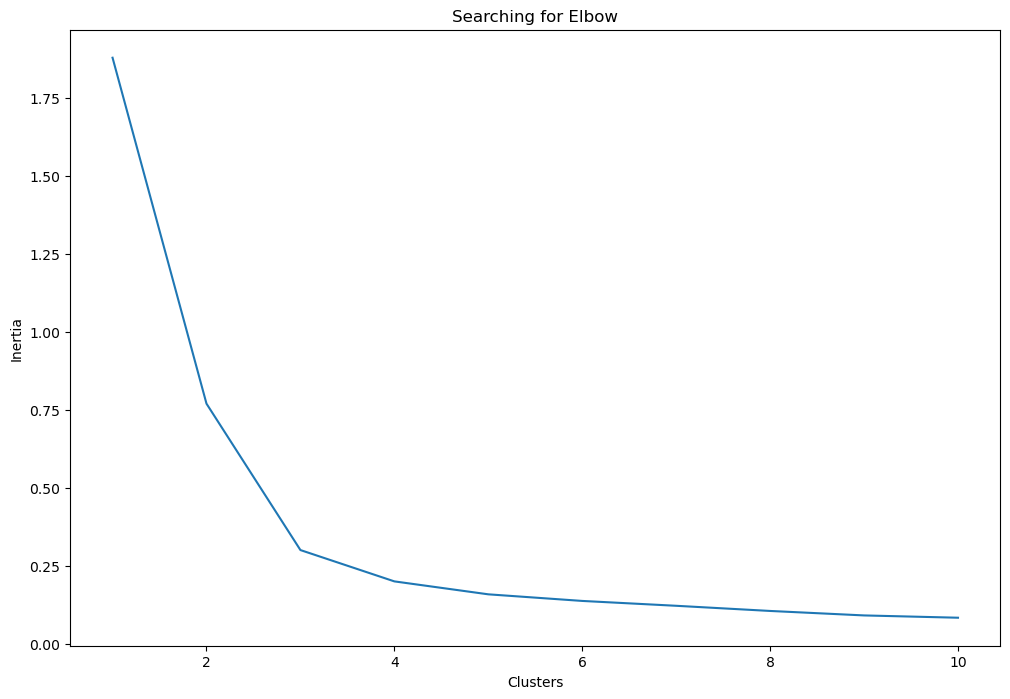

In [61]:
clusters = []

#
for i in range(1, 11):
    km = KMeans( n_clusters = i ).fit( mortalidad_geo) 
    clusters.append( km.inertia_ )

#
fig, ax = plt.subplots( figsize = (12, 8) )
sns.lineplot(x = list(range(1, 11)), y = clusters, ax = ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

Se gráfica el índice de marginación contra diferentes causas de muerte, observándose las diferencias entre las diferentes causas de muerte de acuerdo al nivel de marginación

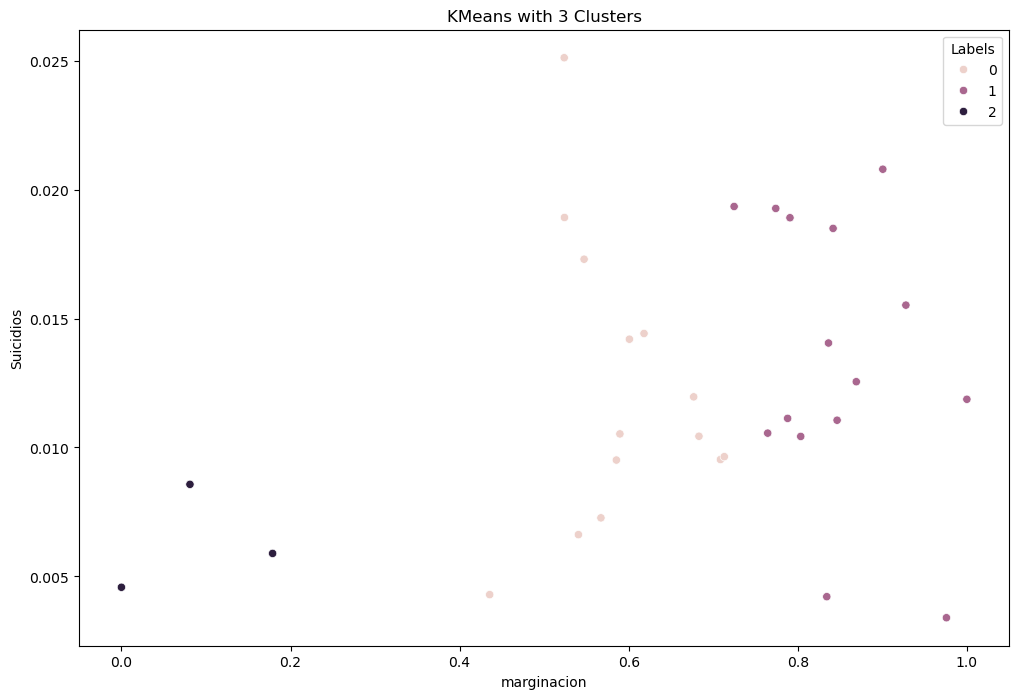

In [62]:
km3 = KMeans(n_clusters = 3).fit( mortalidad_geo) 

mortalidad_geo['Labels'] = km3.labels_ 

plt.figure( figsize = (12, 8) )

sns.scatterplot( data = mortalidad_geo, x = 'marginacion', y = 'Suicidios', hue = 'Labels' )

plt.title('KMeans with 3 Clusters')

plt.show()

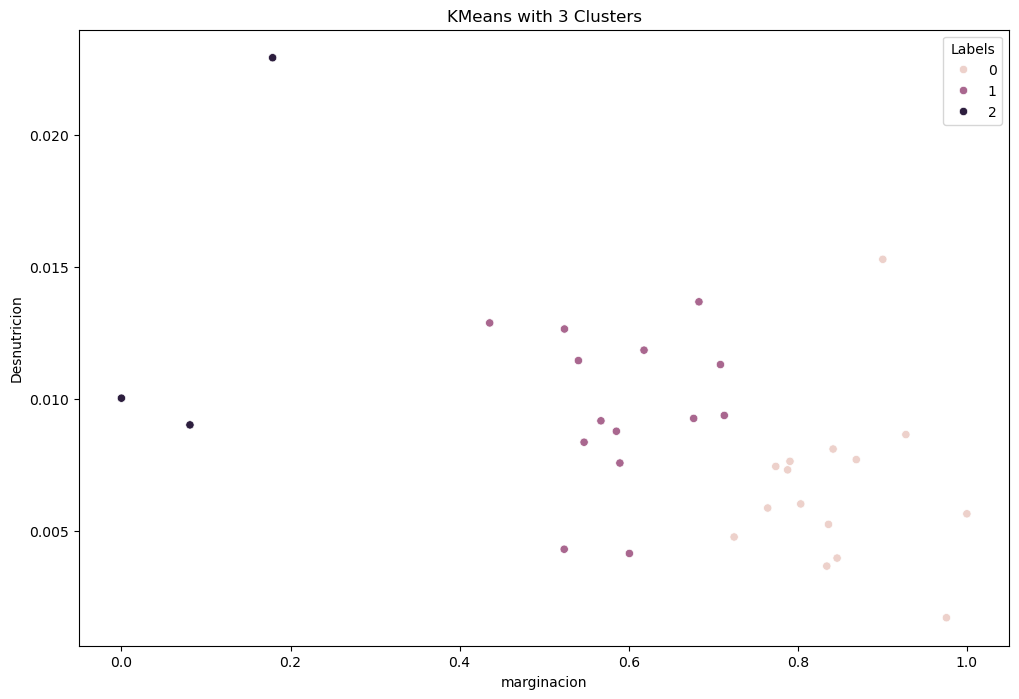

In [63]:
km3 = KMeans(n_clusters = 3).fit( mortalidad_geo) 

mortalidad_geo['Labels'] = km3.labels_ 

plt.figure( figsize = (12, 8) )

sns.scatterplot( data = mortalidad_geo, x = 'marginacion', y = 'Desnutricion', hue = 'Labels' )

plt.title('KMeans with 3 Clusters')

plt.show()

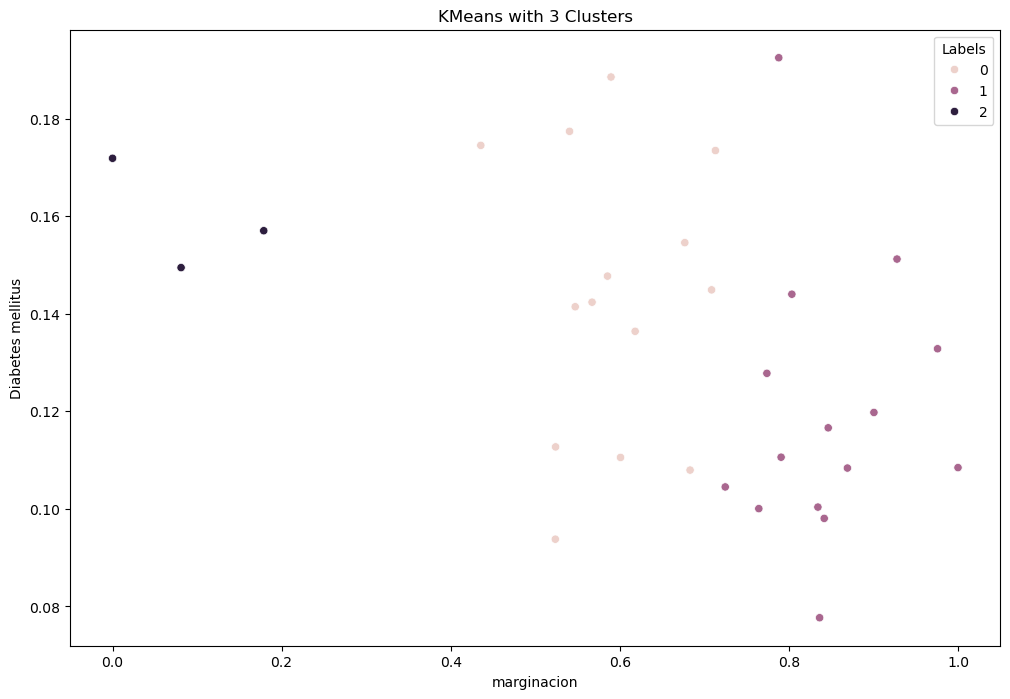

In [64]:
km3 = KMeans(n_clusters = 3).fit( mortalidad_geo) 

mortalidad_geo['Labels'] = km3.labels_ 

plt.figure( figsize = (12, 8) )

sns.scatterplot( data = mortalidad_geo, x = 'marginacion', y = 'Diabetes mellitus', hue = 'Labels' )

plt.title('KMeans with 3 Clusters')

plt.show()

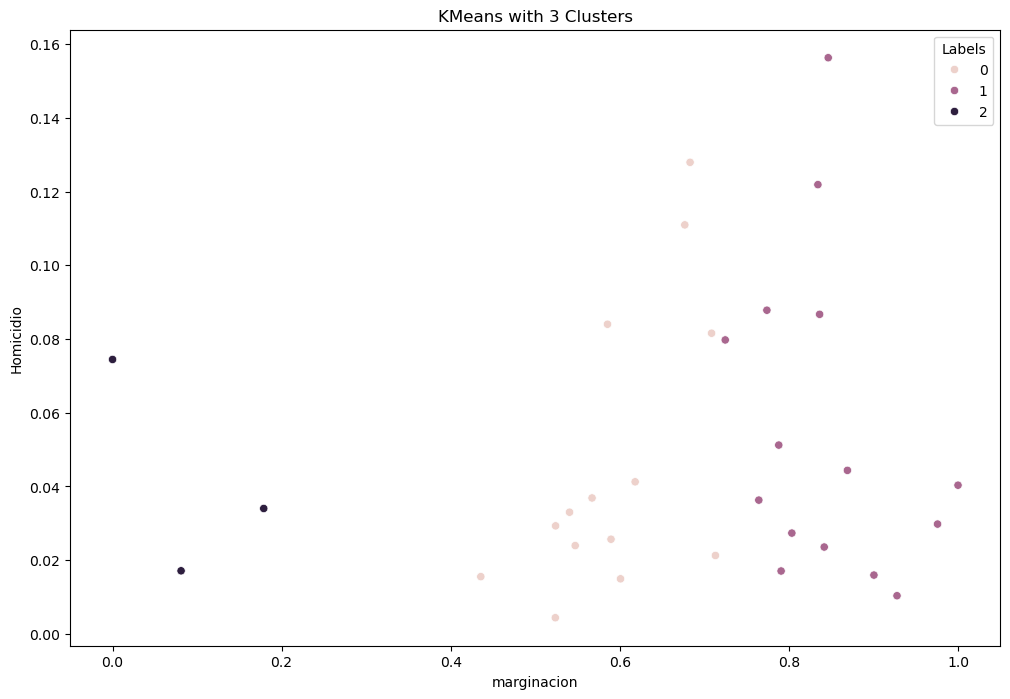

In [65]:
km3 = KMeans(n_clusters = 3).fit( mortalidad_geo) 

mortalidad_geo['Labels'] = km3.labels_ 

plt.figure( figsize = (12, 8) )

sns.scatterplot( data = mortalidad_geo, x = 'marginacion', y = 'Homicidio', hue = 'Labels' )

plt.title('KMeans with 3 Clusters')

plt.show()

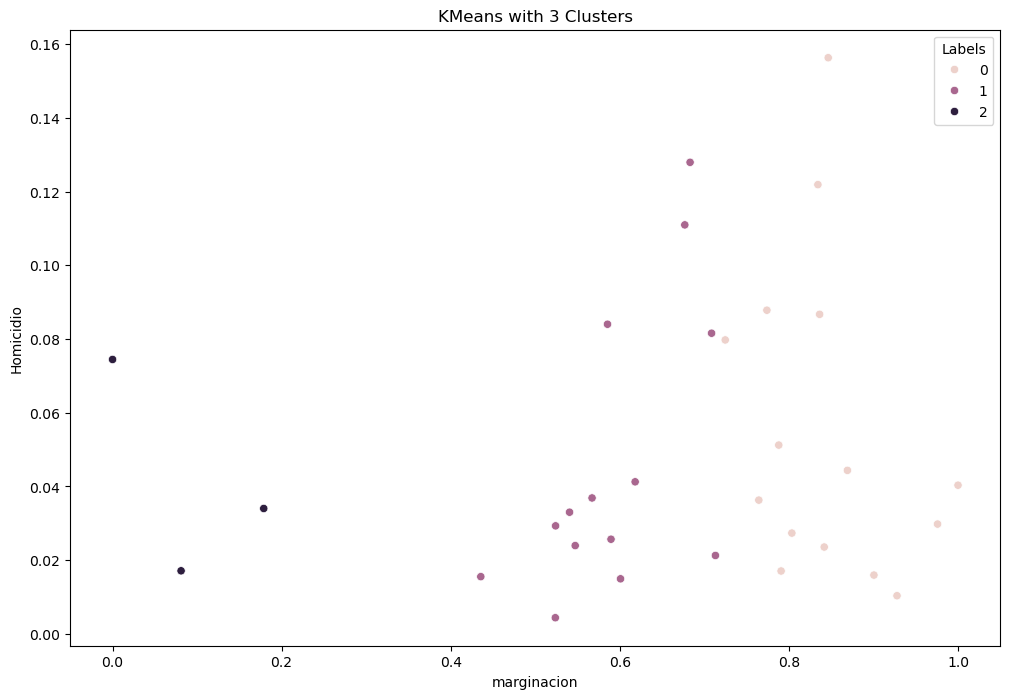

In [66]:
km3 = KMeans(n_clusters = 3).fit( mortalidad_geo) 

mortalidad_geo['Labels'] = km3.labels_ 

plt.figure( figsize = (12, 8) )

sns.scatterplot( data = mortalidad_geo, x = 'marginacion', y = 'Homicidio', hue = 'Labels' )

plt.title('KMeans with 3 Clusters')

plt.show()

In [67]:
mortalidad_geo

Causa,Accidentes de transporte,Causas obstetricas,Desnutricion,Diabetes mellitus,Enfermedad bacteriana,Enfermedad metabolica,Enfermedades cardiacas,Enfermedades cerebrovasculares,Enfermedades circulatorias,Enfermedades de la sangre,Enfermedades del sistema nervioso,Enfermedades digestivas,Enfermedades infecciosas intestinales,Homicidio,Infecciones respiratorias,Infecciones y parasitos,Malformaciones congenitas,Otras enfermedades,Otros accidentes,Otros tumores,Suicidios,Trastornos mentales,Tuberculosis,Tumores Benignos,Tumores malignos digestivos,Tumores malignos genitourinarios,Tumores malignos linfaticos,Tumores malignos respiratorios,Tumores tejido y huesos,Virus,marginacion,Labels
dc_estado,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aguascalientes,0.034780,0.016606,0.015298,0.119770,0.008760,0.023928,0.198876,0.045110,0.007061,0.009545,0.025628,0.096888,0.004707,0.015952,0.100941,0.001961,0.010199,0.063546,0.026935,0.032296,0.020790,0.015690,0.001831,0.001700,0.035303,0.028504,0.011376,0.014514,0.006407,0.005099,0.900555,0
Baja California,0.007417,0.010579,0.003670,0.100367,0.013117,0.011829,0.207331,0.044894,0.004216,0.005192,0.016045,0.073743,0.002381,0.121916,0.080262,0.004138,0.008081,0.055864,0.071518,0.030411,0.004216,0.011790,0.012297,0.000976,0.034549,0.024555,0.009564,0.010306,0.004021,0.014756,0.834284,0
Baja California Sur,0.033190,0.015201,0.008107,0.098049,0.010641,0.012161,0.242463,0.048645,0.006081,0.004814,0.020269,0.084875,0.003547,0.023562,0.093235,0.002027,0.008867,0.055485,0.031670,0.039270,0.018495,0.005320,0.006081,0.000760,0.048645,0.032176,0.014441,0.012161,0.007601,0.012161,0.841758,0
CDMX,0.008123,0.011535,0.001713,0.132832,0.011367,0.016518,0.238805,0.045649,0.007928,0.006773,0.017868,0.108192,0.004191,0.029792,0.089169,0.002907,0.011509,0.067007,0.012016,0.039407,0.003400,0.005177,0.001726,0.001972,0.045830,0.033309,0.019217,0.010900,0.006734,0.008486,0.975817,0
Campeche,0.032319,0.014829,0.008365,0.141445,0.007985,0.010076,0.243156,0.041825,0.002471,0.006084,0.016920,0.089924,0.002471,0.023954,0.062548,0.000570,0.011787,0.084601,0.026046,0.024905,0.017300,0.004753,0.004373,0.001331,0.043726,0.029087,0.012928,0.010266,0.006654,0.017300,0.547235,1
Chiapas,0.021620,0.021620,0.009022,0.149472,0.006831,0.010021,0.243620,0.037859,0.003480,0.014016,0.016690,0.103332,0.011309,0.017109,0.070112,0.001385,0.013178,0.096179,0.014080,0.022393,0.008571,0.004801,0.004736,0.000870,0.039116,0.024874,0.012534,0.006509,0.005059,0.009602,0.081051,2
Chihuahua,0.032398,0.015584,0.004773,0.104498,0.010920,0.016018,0.239297,0.038653,0.007521,0.005351,0.018875,0.083418,0.003254,0.079766,0.083382,0.003435,0.007557,0.053117,0.033230,0.032217,0.019345,0.009835,0.004484,0.000723,0.030048,0.025600,0.009329,0.012836,0.006834,0.007702,0.724689,0
Coahuila,0.021688,0.017759,0.008655,0.151221,0.008755,0.015023,0.261901,0.044073,0.004875,0.003482,0.019599,0.082923,0.001642,0.010347,0.085012,0.002835,0.009700,0.066458,0.030891,0.035418,0.015520,0.004726,0.003184,0.000945,0.036214,0.027260,0.009252,0.011342,0.004228,0.005074,0.927850,0
Colima,0.032308,0.009157,0.003974,0.116621,0.010539,0.007947,0.175536,0.040256,0.003974,0.003628,0.018832,0.088113,0.001728,0.156358,0.078093,0.000864,0.005529,0.081894,0.026607,0.028853,0.011057,0.005356,0.004319,0.000691,0.029371,0.025225,0.011921,0.008984,0.004838,0.007429,0.846490,0


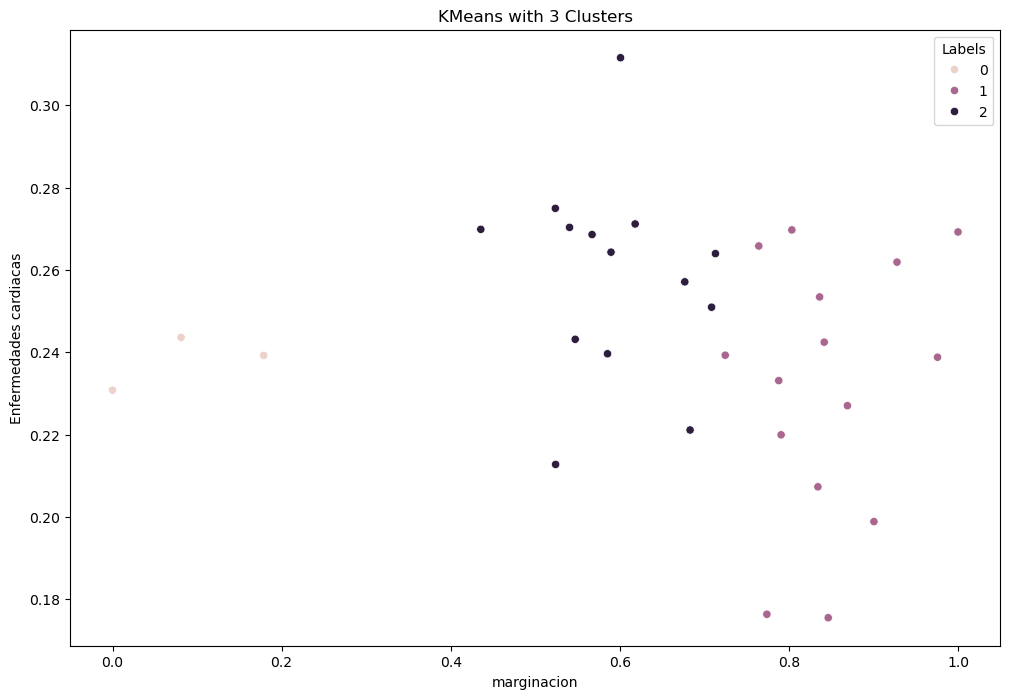

In [68]:
km3 = KMeans(n_clusters = 3).fit( mortalidad_geo) 

mortalidad_geo['Labels'] = km3.labels_ 

plt.figure( figsize = (12, 8) )

sns.scatterplot( data = mortalidad_geo, x = 'marginacion', y = 'Enfermedades cardiacas', hue = 'Labels' )

plt.title('KMeans with 3 Clusters')

plt.show()

In [69]:
mortalidad_geo=mortalidad_geo.multiply(100)

In [70]:
mortalidad_geo['Labels']=mortalidad_geo['Labels']/100

In [71]:
mortalidad_geo

Causa,Accidentes de transporte,Causas obstetricas,Desnutricion,Diabetes mellitus,Enfermedad bacteriana,Enfermedad metabolica,Enfermedades cardiacas,Enfermedades cerebrovasculares,Enfermedades circulatorias,Enfermedades de la sangre,Enfermedades del sistema nervioso,Enfermedades digestivas,Enfermedades infecciosas intestinales,Homicidio,Infecciones respiratorias,Infecciones y parasitos,Malformaciones congenitas,Otras enfermedades,Otros accidentes,Otros tumores,Suicidios,Trastornos mentales,Tuberculosis,Tumores Benignos,Tumores malignos digestivos,Tumores malignos genitourinarios,Tumores malignos linfaticos,Tumores malignos respiratorios,Tumores tejido y huesos,Virus,marginacion,Labels
dc_estado,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aguascalientes,3.478033,1.660565,1.529812,11.976987,0.876046,2.392782,19.887552,4.510983,0.706067,0.954498,2.562762,9.688808,0.470711,1.595188,10.094142,0.196130,1.019874,6.354603,2.693515,3.229603,2.078975,1.569038,0.183054,0.169979,3.530335,2.850418,1.137552,1.451360,0.640690,0.509937,90.0555,1.0
Baja California,0.741724,1.057933,0.366958,10.036696,1.311680,1.182854,20.733136,4.489382,0.421611,0.519207,1.604466,7.374297,0.238132,12.191599,8.026234,0.413804,0.808089,5.586352,7.151780,3.041068,0.421611,1.178951,1.229700,0.097595,3.454872,2.455497,0.956433,1.030606,0.402092,1.475640,83.4284,1.0
Baja California Sur,3.318976,1.520142,0.810742,9.804915,1.064099,1.216114,24.246263,4.864454,0.608057,0.481378,2.026856,8.487459,0.354700,2.356220,9.323537,0.202686,0.886749,5.548518,3.166962,3.927033,1.849506,0.532050,0.608057,0.076007,4.864454,3.217634,1.444135,1.216114,0.760071,1.216114,84.1758,1.0
CDMX,0.812280,1.153542,0.171280,13.283247,1.136673,1.651809,23.880520,4.564859,0.792817,0.677333,1.786757,10.819157,0.419116,2.979226,8.916916,0.290656,1.150947,6.700663,1.201552,3.940727,0.339964,0.517731,0.172577,0.197231,4.583025,3.330868,1.921704,1.089961,0.673440,0.848612,97.5817,1.0
Campeche,3.231939,1.482890,0.836502,14.144487,0.798479,1.007605,24.315589,4.182510,0.247148,0.608365,1.692015,8.992395,0.247148,2.395437,6.254753,0.057034,1.178707,8.460076,2.604563,2.490494,1.730038,0.475285,0.437262,0.133080,4.372624,2.908745,1.292776,1.026616,0.665399,1.730038,54.7235,2.0
Chiapas,2.162005,2.162005,0.902178,14.947158,0.683078,1.002062,24.362031,3.785926,0.347983,1.401598,1.669030,10.333161,1.130945,1.710916,7.011213,0.138549,1.317824,9.617863,1.408042,2.239335,0.857069,0.480088,0.473644,0.086996,3.911587,2.487434,1.253383,0.650857,0.505864,0.960175,8.1051,0.0
Chihuahua,3.239803,1.558432,0.477292,10.449812,1.091987,1.601822,23.929708,3.865346,0.752097,0.535146,1.887475,8.341770,0.325427,7.976569,8.338154,0.343506,0.755713,5.311686,3.322968,3.221724,1.934481,0.983512,0.448366,0.072317,3.004773,2.560023,0.932890,1.283627,0.683396,0.770176,72.4689,1.0
Coahuila,2.168831,1.775854,0.865542,15.122121,0.875491,1.502263,26.190121,4.407302,0.487489,0.348207,1.959906,8.292295,0.164155,1.034671,8.501219,0.283540,0.970004,6.645774,3.089091,3.541760,1.552007,0.472566,0.318360,0.094513,3.621350,2.725961,0.925235,1.134159,0.422822,0.507387,92.7850,1.0
Colima,3.230822,0.915688,0.397374,11.662059,1.053905,0.794748,17.553559,4.025570,0.397374,0.362820,1.883207,8.811334,0.172771,15.635798,7.809261,0.086386,0.552868,8.189357,2.660677,2.885280,1.105736,0.535591,0.431928,0.069109,2.937111,2.522460,1.192122,0.898411,0.483760,0.742916,84.6490,1.0


Se codifican los 3 clúster como de "Marginacion alta", "Marginacion baja" y "Marginacion media", de acuerdo con las caracteísticas observadas en el modelo

In [81]:
conditionlist = [
    (mortalidad_geo["Labels"] == 0),
    (mortalidad_geo["Labels"] == 1),
    (mortalidad_geo["Labels"] == 2),
]
choicelist = ["Marginacion alta", "Marginacion baja", "Marginacion media"]
mortalidad_geo["m_marginacion"] = np.select(conditionlist, choicelist, default="Not Specified")


In [82]:
mortalidad_geo

Causa,Accidentes de transporte,Causas obstetricas,Desnutricion,Diabetes mellitus,Enfermedad bacteriana,Enfermedad metabolica,Enfermedades cardiacas,Enfermedades cerebrovasculares,Enfermedades circulatorias,Enfermedades de la sangre,Enfermedades del sistema nervioso,Enfermedades digestivas,Enfermedades infecciosas intestinales,Homicidio,Infecciones respiratorias,Infecciones y parasitos,Malformaciones congenitas,Otras enfermedades,Otros accidentes,Otros tumores,Suicidios,Trastornos mentales,Tuberculosis,Tumores Benignos,Tumores malignos digestivos,Tumores malignos genitourinarios,Tumores malignos linfaticos,Tumores malignos respiratorios,Tumores tejido y huesos,Virus,marginacion,Labels,m_marginacion
dc_estado,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aguascalientes,3.478033,1.660565,1.529812,11.976987,0.876046,2.392782,19.887552,4.510983,0.706067,0.954498,2.562762,9.688808,0.470711,1.595188,10.094142,0.196130,1.019874,6.354603,2.693515,3.229603,2.078975,1.569038,0.183054,0.169979,3.530335,2.850418,1.137552,1.451360,0.640690,0.509937,90.0555,1.0,Marginacion baja
Baja California,0.741724,1.057933,0.366958,10.036696,1.311680,1.182854,20.733136,4.489382,0.421611,0.519207,1.604466,7.374297,0.238132,12.191599,8.026234,0.413804,0.808089,5.586352,7.151780,3.041068,0.421611,1.178951,1.229700,0.097595,3.454872,2.455497,0.956433,1.030606,0.402092,1.475640,83.4284,1.0,Marginacion baja
Baja California Sur,3.318976,1.520142,0.810742,9.804915,1.064099,1.216114,24.246263,4.864454,0.608057,0.481378,2.026856,8.487459,0.354700,2.356220,9.323537,0.202686,0.886749,5.548518,3.166962,3.927033,1.849506,0.532050,0.608057,0.076007,4.864454,3.217634,1.444135,1.216114,0.760071,1.216114,84.1758,1.0,Marginacion baja
CDMX,0.812280,1.153542,0.171280,13.283247,1.136673,1.651809,23.880520,4.564859,0.792817,0.677333,1.786757,10.819157,0.419116,2.979226,8.916916,0.290656,1.150947,6.700663,1.201552,3.940727,0.339964,0.517731,0.172577,0.197231,4.583025,3.330868,1.921704,1.089961,0.673440,0.848612,97.5817,1.0,Marginacion baja
Campeche,3.231939,1.482890,0.836502,14.144487,0.798479,1.007605,24.315589,4.182510,0.247148,0.608365,1.692015,8.992395,0.247148,2.395437,6.254753,0.057034,1.178707,8.460076,2.604563,2.490494,1.730038,0.475285,0.437262,0.133080,4.372624,2.908745,1.292776,1.026616,0.665399,1.730038,54.7235,2.0,Marginacion media
Chiapas,2.162005,2.162005,0.902178,14.947158,0.683078,1.002062,24.362031,3.785926,0.347983,1.401598,1.669030,10.333161,1.130945,1.710916,7.011213,0.138549,1.317824,9.617863,1.408042,2.239335,0.857069,0.480088,0.473644,0.086996,3.911587,2.487434,1.253383,0.650857,0.505864,0.960175,8.1051,0.0,Marginacion alta
Chihuahua,3.239803,1.558432,0.477292,10.449812,1.091987,1.601822,23.929708,3.865346,0.752097,0.535146,1.887475,8.341770,0.325427,7.976569,8.338154,0.343506,0.755713,5.311686,3.322968,3.221724,1.934481,0.983512,0.448366,0.072317,3.004773,2.560023,0.932890,1.283627,0.683396,0.770176,72.4689,1.0,Marginacion baja
Coahuila,2.168831,1.775854,0.865542,15.122121,0.875491,1.502263,26.190121,4.407302,0.487489,0.348207,1.959906,8.292295,0.164155,1.034671,8.501219,0.283540,0.970004,6.645774,3.089091,3.541760,1.552007,0.472566,0.318360,0.094513,3.621350,2.725961,0.925235,1.134159,0.422822,0.507387,92.7850,1.0,Marginacion baja
Colima,3.230822,0.915688,0.397374,11.662059,1.053905,0.794748,17.553559,4.025570,0.397374,0.362820,1.883207,8.811334,0.172771,15.635798,7.809261,0.086386,0.552868,8.189357,2.660677,2.885280,1.105736,0.535591,0.431928,0.069109,2.937111,2.522460,1.192122,0.898411,0.483760,0.742916,84.6490,1.0,Marginacion baja


In [83]:
mortalidad_geo['m_marginacion']

dc_estado
Aguascalientes          Marginacion baja
Baja California         Marginacion baja
Baja California Sur     Marginacion baja
CDMX                    Marginacion baja
Campeche               Marginacion media
Chiapas                 Marginacion alta
Chihuahua               Marginacion baja
Coahuila                Marginacion baja
Colima                  Marginacion baja
Durango                Marginacion media
EDOMEX                  Marginacion baja
Guanajuato             Marginacion media
Guerrero                Marginacion alta
Hidalgo                Marginacion media
Jalisco                 Marginacion baja
Michoacan              Marginacion media
Morelos                Marginacion media
Nayarit                Marginacion media
Nuevo Leon              Marginacion baja
Oaxaca                  Marginacion alta
Puebla                 Marginacion media
Queretaro               Marginacion baja
Quintana Roo            Marginacion baja
San Luis Potosi        Marginacion media
Sinalo

Se obtienen los descriptivos para saber la prevalencia promedio de cada causa de mortalidad de acuerdo a el nivel de marginación el la que el modelo clasificó a cada estado

In [84]:
mortalidad_geo[ mortalidad_geo["m_marginacion"] == "Marginacion alta"].describe()

Causa,Accidentes de transporte,Causas obstetricas,Desnutricion,Diabetes mellitus,Enfermedad bacteriana,Enfermedad metabolica,Enfermedades cardiacas,Enfermedades cerebrovasculares,Enfermedades circulatorias,Enfermedades de la sangre,Enfermedades del sistema nervioso,Enfermedades digestivas,Enfermedades infecciosas intestinales,Homicidio,Infecciones respiratorias,Infecciones y parasitos,Malformaciones congenitas,Otras enfermedades,Otros accidentes,Otros tumores,Suicidios,Trastornos mentales,Tuberculosis,Tumores Benignos,Tumores malignos digestivos,Tumores malignos genitourinarios,Tumores malignos linfaticos,Tumores malignos respiratorios,Tumores tejido y huesos,Virus,marginacion,Labels
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0
mean,2.148501,1.691444,1.399870,15.946188,0.613371,1.337899,23.789152,4.701667,0.392741,1.276011,1.533467,9.334250,0.696297,4.186570,6.632720,0.192971,1.021939,8.022487,2.105211,2.155937,0.634781,0.727843,0.370007,0.099551,3.715730,2.363143,1.099225,0.618060,0.457846,0.735120,8.662433,0.0
std,0.174411,0.505250,0.775936,1.140072,0.158996,0.294031,0.651474,1.049590,0.067197,0.135649,0.148947,1.065212,0.377320,2.947111,0.420218,0.085172,0.256486,1.496884,0.783982,0.072353,0.203387,0.390953,0.089953,0.011255,0.225963,0.116919,0.144265,0.097306,0.047114,0.211618,8.954118,0.0
min,1.967731,1.157489,0.902178,14.947158,0.431428,1.002062,23.080486,3.785926,0.347983,1.132153,1.374022,8.213256,0.452861,1.710916,6.180527,0.138549,0.862855,6.648827,1.408042,2.109922,0.458007,0.480088,0.312171,0.086996,3.468506,2.255349,0.967476,0.508593,0.411692,0.540161,0.000000,0.0
25%,2.064868,1.456163,0.952839,15.325210,0.557253,1.232353,23.502712,4.128965,0.354107,1.213218,1.465685,8.834794,0.478974,2.556616,6.443473,0.143894,0.873997,7.224799,1.680871,2.114238,0.523637,0.502498,0.318189,0.094959,3.617802,2.300997,1.022146,0.579725,0.433836,0.622592,4.052550,0.0
50%,2.162005,1.754837,1.003499,15.703262,0.683078,1.462645,23.924939,4.472005,0.360231,1.294283,1.557348,9.456331,0.505086,3.402315,6.706419,0.149238,0.885138,7.800772,1.953700,2.118555,0.589267,0.524907,0.324207,0.102923,3.767099,2.346645,1.076815,0.650857,0.455980,0.705023,8.105100,0.0
75%,2.238887,1.958421,1.648716,16.445703,0.704342,1.505818,24.143485,5.159538,0.415121,1.347940,1.613189,9.894746,0.818015,5.424398,6.858816,0.220182,1.101481,8.709317,2.453795,2.178945,0.723168,0.851721,0.398926,0.105828,3.839343,2.417039,1.165099,0.672794,0.480922,0.832599,12.993650,0.0
max,2.315768,2.162005,2.293932,17.188143,0.725607,1.548991,24.362031,5.847071,0.470011,1.401598,1.669030,10.333161,1.130945,7.446480,7.011213,0.291126,1.317824,9.617863,2.953890,2.239335,0.857069,1.178534,0.473644,0.108734,3.911587,2.487434,1.253383,0.694730,0.505864,0.960175,17.882200,0.0


In [85]:
mortalidad_geo[ mortalidad_geo["m_marginacion"] == "Marginacion media"].describe()

Causa,Accidentes de transporte,Causas obstetricas,Desnutricion,Diabetes mellitus,Enfermedad bacteriana,Enfermedad metabolica,Enfermedades cardiacas,Enfermedades cerebrovasculares,Enfermedades circulatorias,Enfermedades de la sangre,Enfermedades del sistema nervioso,Enfermedades digestivas,Enfermedades infecciosas intestinales,Homicidio,Infecciones respiratorias,Infecciones y parasitos,Malformaciones congenitas,Otras enfermedades,Otros accidentes,Otros tumores,Suicidios,Trastornos mentales,Tuberculosis,Tumores Benignos,Tumores malignos digestivos,Tumores malignos genitourinarios,Tumores malignos linfaticos,Tumores malignos respiratorios,Tumores tejido y huesos,Virus,marginacion,Labels
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.0
mean,2.832449,1.356413,0.963276,14.331449,0.821403,1.332754,25.853661,4.356365,0.432947,0.632361,1.603951,9.019084,0.344576,4.648512,7.770293,0.152532,1.004538,6.263628,2.509718,2.530361,1.212552,0.518052,0.235683,0.102257,3.497976,2.567875,1.063932,0.840443,0.550672,0.650286,59.384071,2.0
std,0.922172,0.345191,0.294346,2.909815,0.177781,0.289441,2.452377,0.661654,0.097987,0.164809,0.249048,1.258948,0.180570,3.857330,1.355736,0.044842,0.263004,1.266334,0.449963,0.291929,0.548740,0.191762,0.181723,0.024493,0.442316,0.288427,0.176367,0.218572,0.067553,0.448599,8.015593,0.0
min,0.881109,0.786997,0.414900,9.378577,0.636985,0.942571,21.276312,3.603495,0.247148,0.424119,1.318458,6.785571,0.160923,0.437622,6.254753,0.057034,0.667237,4.804660,1.898606,2.047827,0.429562,0.288320,0.026424,0.077029,2.797263,2.137544,0.819131,0.525536,0.435693,0.118906,43.556300,2.0
25%,2.310488,1.169876,0.846912,11.863378,0.685715,1.118056,24.510525,3.905531,0.387435,0.534688,1.460466,7.953029,0.221531,2.194182,6.808153,0.129002,0.846743,5.480280,2.193121,2.373467,0.951820,0.417214,0.095172,0.086675,3.242005,2.298711,0.941229,0.721865,0.520371,0.362319,54.220925,2.0
50%,2.930471,1.395929,0.932394,14.364181,0.760844,1.317391,26.414344,4.210725,0.422889,0.612096,1.545682,8.858304,0.288746,3.116186,7.186449,0.151193,0.930087,5.681169,2.522358,2.438097,1.048165,0.468849,0.179964,0.092287,3.482046,2.571600,1.030062,0.818702,0.533703,0.454847,58.750600,2.0
75%,3.446209,1.481533,1.175598,16.874976,0.924088,1.463298,27.021961,4.480470,0.458703,0.665158,1.681880,9.902457,0.382357,7.150839,8.750783,0.172668,1.135493,6.850215,2.664066,2.793902,1.436515,0.568752,0.336682,0.115705,3.618627,2.737430,1.167756,0.894519,0.590759,0.944207,66.217025,2.0
max,4.263256,2.129817,1.368691,18.854767,1.159073,2.078700,31.154343,5.783343,0.633020,1.041772,2.278177,10.967481,0.746070,12.797263,10.418587,0.248940,1.585414,8.705312,3.450573,3.024156,2.511277,0.992301,0.666134,0.160923,4.372624,3.050893,1.434893,1.425526,0.679456,1.730038,71.308400,2.0


In [86]:
mortalidad_geo[ mortalidad_geo["m_marginacion"] == "Marginacion baja"].describe()

Causa,Accidentes de transporte,Causas obstetricas,Desnutricion,Diabetes mellitus,Enfermedad bacteriana,Enfermedad metabolica,Enfermedades cardiacas,Enfermedades cerebrovasculares,Enfermedades circulatorias,Enfermedades de la sangre,Enfermedades del sistema nervioso,Enfermedades digestivas,Enfermedades infecciosas intestinales,Homicidio,Infecciones respiratorias,Infecciones y parasitos,Malformaciones congenitas,Otras enfermedades,Otros accidentes,Otros tumores,Suicidios,Trastornos mentales,Tuberculosis,Tumores Benignos,Tumores malignos digestivos,Tumores malignos genitourinarios,Tumores malignos linfaticos,Tumores malignos respiratorios,Tumores tejido y huesos,Virus,marginacion,Labels
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.0
mean,2.463476,1.383212,0.660688,11.952254,1.076892,1.389702,23.192784,4.421995,0.583237,0.526923,1.936852,8.823428,0.301899,5.525966,8.786241,0.263253,0.912692,6.320274,3.165542,3.303225,1.343914,0.724470,0.479633,0.097725,3.664852,2.831065,1.183138,1.130056,0.594436,0.960899,84.516867,1.0
std,0.998592,0.264422,0.307036,2.763842,0.201489,0.371674,3.125207,0.385177,0.194983,0.164795,0.258517,1.630438,0.093535,4.266686,1.251314,0.154082,0.189476,0.922431,1.382745,0.378342,0.534904,0.342504,0.293117,0.040269,0.519969,0.273460,0.287211,0.254318,0.128820,0.566633,7.829098,0.0
min,0.741724,0.915688,0.171280,7.768368,0.769748,0.794748,17.553559,3.865346,0.366474,0.328354,1.514363,5.818160,0.134421,1.034671,6.206407,0.086386,0.552868,4.935535,1.201552,2.673603,0.339964,0.301289,0.081430,0.059109,2.937111,2.455497,0.750961,0.723818,0.402092,0.485184,72.468900,1.0
25%,2.021032,1.189071,0.501219,10.243254,0.952268,1.176603,21.364484,4.201686,0.434194,0.438999,1.768186,8.072169,0.250946,2.545497,7.986765,0.186320,0.807342,5.620521,2.512801,3.087235,1.080713,0.498119,0.271386,0.070713,3.464600,2.645807,0.980640,0.964508,0.478314,0.718761,78.937200,1.0
50%,2.635189,1.449898,0.602577,11.059659,1.064099,1.257339,23.880520,4.401996,0.510053,0.486329,1.959906,8.650249,0.324783,4.034450,8.721155,0.237234,0.917771,6.354603,2.693515,3.229603,1.255092,0.565483,0.448366,0.088963,3.601967,2.744003,1.137552,1.134159,0.592114,0.802045,83.631900,1.0
75%,3.259942,1.558718,0.767368,13.031268,1.144724,1.599707,25.767152,4.537921,0.729082,0.566371,2.039900,10.023096,0.349257,8.324283,9.386570,0.287098,1.040149,6.811926,3.324445,3.520480,1.870188,0.952087,0.633190,0.106681,3.773167,3.012372,1.356955,1.249870,0.676575,0.943377,88.487600,1.0
max,3.694917,1.775854,1.529812,19.250170,1.570705,2.392782,26.972281,5.323644,1.057344,0.954498,2.562762,11.623061,0.470711,15.635798,11.420603,0.733311,1.203982,8.189357,7.151780,3.940727,2.078975,1.569038,1.229700,0.197231,4.864454,3.330868,1.921704,1.678430,0.848962,2.778106,100.000000,1.0


In [78]:
#mortalidad_geo = mortalidad_geo.reset_index()

In [92]:
#Causa_muerte=['Accidentes de transporte','Causas obstetricas','Desnutricion','Diabetes mellitus','Enfermedad bacteriana','Enfermedad metabolica','Enfermedades cardiacas','Enfermedades cerebrovasculares','Enfermedades circulatorias','Enfermedades de la sangre','Enfermedades del sistema nervioso','Enfermedades digestivas','Enfermedades infecciosas intestinales','Homicidio','Infecciones respiratorias','Infecciones y parasitos','Malformaciones congenitas','Otras enfermedades','Otros accidentes','Otros tumores','Suicidios','Trastornos mentales','Tuberculosis','Tumores Benignos','Tumores malignos digestivos','Tumores malignos genitourinarios','Tumores malignos linfaticos','Tumores malignos respiratorios','Tumores tejido y huesos','Virus',
#              'Accidentes de transporte','Causas obstetricas','Desnutricion','Diabetes mellitus','Enfermedad bacteriana','Enfermedad metabolica','Enfermedades cardiacas','Enfermedades cerebrovasculares','Enfermedades circulatorias','Enfermedades de la sangre','Enfermedades del sistema nervioso','Enfermedades digestivas','Enfermedades infecciosas intestinales','Homicidio','Infecciones respiratorias','Infecciones y parasitos','Malformaciones congenitas','Otras enfermedades','Otros accidentes','Otros tumores','Suicidios','Trastornos mentales','Tuberculosis','Tumores Benignos','Tumores malignos digestivos','Tumores malignos genitourinarios','Tumores malignos linfaticos','Tumores malignos respiratorios','Tumores tejido y huesos','Virus',
#              'Accidentes de transporte','Causas obstetricas','Desnutricion','Diabetes mellitus','Enfermedad bacteriana','Enfermedad metabolica','Enfermedades cardiacas','Enfermedades cerebrovasculares','Enfermedades circulatorias','Enfermedades de la sangre','Enfermedades del sistema nervioso','Enfermedades digestivas','Enfermedades infecciosas intestinales','Homicidio','Infecciones respiratorias','Infecciones y parasitos','Malformaciones congenitas','Otras enfermedades','Otros accidentes','Otros tumores','Suicidios','Trastornos mentales','Tuberculosis','Tumores Benignos','Tumores malignos digestivos','Tumores malignos genitourinarios','Tumores malignos linfaticos','Tumores malignos respiratorios','Tumores tejido y huesos','Virus']

In [94]:
Prevalencia=[2.148501,1.691444,1.399870,15.946188,0.613371,1.337899,23.789152,4.701667,0.392741,1.276011,1.533467,9.334250,0.696297,4.186570,6.632720,0.192971,1.021939,8.022487,2.105211,2.155937,0.634781,0.727843,0.370007,0.099551,3.715730,2.363143,1.099225,0.618060,0.457846,0.735120,
                2.832449,1.356413,0.963276,14.331449,0.821403,1.332754,25.853661,4.356365,0.432947,0.632361,1.603951,9.019084,0.344576,4.648512,7.770293,0.152532,1.004538,6.263628,2.509718,2.530361,1.212552,0.518052,0.235683,0.102257,3.497976,2.567875,1.063932,0.840443,0.550672,0.650286,
               2.463476,1.383212,0.660688,11.952254,1.076892,1.389702,23.192784,4.421995,0.583237,0.526923,1.936852,8.823428,0.301899,5.525966,8.786241,0.263253,0.912692,6.320274,3.165542,3.303225,1.343914,0.724470,0.479633,0.097725,3.664852,2.831065,1.183138,1.130056,0.594436,0.960899]

In [95]:
#Marginacion_media=[2.832449,1.356413,0.963276,14.331449,0.821403,1.332754,25.853661,4.356365,0.432947,0.632361,1.603951,9.019084,0.344576,4.648512,7.770293,0.152532,1.004538,6.263628,2.509718,2.530361,1.212552,0.518052,0.235683,0.102257,3.497976,2.567875,1.063932,0.840443,0.550672,0.650286]

In [93]:
#Marginacion_baja=[2.463476,1.383212,0.660688,11.952254,1.076892,1.389702,23.192784,4.421995,0.583237,0.526923,1.936852,8.823428,0.301899,5.525966,8.786241,0.263253,0.912692,6.320274,3.165542,3.303225,1.343914,0.724470,0.479633,0.097725,3.664852,2.831065,1.183138,1.130056,0.594436,0.960899]

In [ ]:
#Marginación=['Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta',
#              'Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media',
#              'Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja']

In [105]:
mortalidad = {
    'Causa_muerte': ['Accidentes de transporte','Causas obstetricas','Desnutricion','Diabetes mellitus','Enfermedad bacteriana','Enfermedad metabolica','Enfermedades cardiacas','Enfermedades cerebrovasculares','Enfermedades circulatorias','Enfermedades de la sangre','Enfermedades del sistema nervioso','Enfermedades digestivas','Enfermedades infecciosas intestinales','Homicidio','Infecciones respiratorias','Infecciones y parasitos','Malformaciones congenitas','Otras enfermedades','Otros accidentes','Otros tumores','Suicidios','Trastornos mentales','Tuberculosis','Tumores Benignos','Tumores malignos digestivos','Tumores malignos genitourinarios','Tumores malignos linfaticos','Tumores malignos respiratorios','Tumores tejido y huesos','Virus',
              'Accidentes de transporte','Causas obstetricas','Desnutricion','Diabetes mellitus','Enfermedad bacteriana','Enfermedad metabolica','Enfermedades cardiacas','Enfermedades cerebrovasculares','Enfermedades circulatorias','Enfermedades de la sangre','Enfermedades del sistema nervioso','Enfermedades digestivas','Enfermedades infecciosas intestinales','Homicidio','Infecciones respiratorias','Infecciones y parasitos','Malformaciones congenitas','Otras enfermedades','Otros accidentes','Otros tumores','Suicidios','Trastornos mentales','Tuberculosis','Tumores Benignos','Tumores malignos digestivos','Tumores malignos genitourinarios','Tumores malignos linfaticos','Tumores malignos respiratorios','Tumores tejido y huesos','Virus',
              'Accidentes de transporte','Causas obstetricas','Desnutricion','Diabetes mellitus','Enfermedad bacteriana','Enfermedad metabolica','Enfermedades cardiacas','Enfermedades cerebrovasculares','Enfermedades circulatorias','Enfermedades de la sangre','Enfermedades del sistema nervioso','Enfermedades digestivas','Enfermedades infecciosas intestinales','Homicidio','Infecciones respiratorias','Infecciones y parasitos','Malformaciones congenitas','Otras enfermedades','Otros accidentes','Otros tumores','Suicidios','Trastornos mentales','Tuberculosis','Tumores Benignos','Tumores malignos digestivos','Tumores malignos genitourinarios','Tumores malignos linfaticos','Tumores malignos respiratorios','Tumores tejido y huesos','Virus'],
   
    'Nivel_marginacion':  ['Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta','Marginación alta',
              'Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media','Marginación media',
              'Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja','Marginación baja'],
    
    'Prevalencia': [2.148501,1.691444,1.399870,15.946188,0.613371,1.337899,23.789152,4.701667,0.392741,1.276011,1.533467,9.334250,0.696297,4.186570,6.632720,0.192971,1.021939,8.022487,2.105211,2.155937,0.634781,0.727843,0.370007,0.099551,3.715730,2.363143,1.099225,0.618060,0.457846,0.735120,
                2.832449,1.356413,0.963276,14.331449,0.821403,1.332754,25.853661,4.356365,0.432947,0.632361,1.603951,9.019084,0.344576,4.648512,7.770293,0.152532,1.004538,6.263628,2.509718,2.530361,1.212552,0.518052,0.235683,0.102257,3.497976,2.567875,1.063932,0.840443,0.550672,0.650286,
               2.463476,1.383212,0.660688,11.952254,1.076892,1.389702,23.192784,4.421995,0.583237,0.526923,1.936852,8.823428,0.301899,5.525966,8.786241,0.263253,0.912692,6.320274,3.165542,3.303225,1.343914,0.724470,0.479633,0.097725,3.664852,2.831065,1.183138,1.130056,0.594436,0.960899]
}
    

In [106]:
mortalidad_shiny = pd.DataFrame(mortalidad)

In [107]:
mortalidad_shiny

,Causa_muerte,Nivel_marginacion,Prevalencia
0,Accidentes de transporte,Marginación alta,2.148501
1,Causas obstetricas,Marginación alta,1.691444
2,Desnutricion,Marginación alta,1.399870
3,Diabetes mellitus,Marginación alta,15.946188
4,Enfermedad bacteriana,Marginación alta,0.613371
...,...,...,...
85,Tumores malignos genitourinarios,Marginación baja,2.831065
86,Tumores malignos linfaticos,Marginación baja,1.183138
87,Tumores malignos respiratorios,Marginación baja,1.130056
88,Tumores tejido y huesos,Marginación baja,0.594436


In [108]:
mortalidad_shiny.to_csv('Mortalidad_shiny.csv')

Finalmente ya que se ha obtenido una clasificación de los estados en estados con Marginación Baja, estados de Marginación Media y estados de Alta Marginación. Se crea una app que permite visualizar la prevalencia promedio de las distintas causas de muerte, de acuerdo con el nivel de marginación de los estados en los que aconteció. 

Como se planteó en la hipótesis y como se ve en la app de shiny, ciertas causas de muerte como la diabetes y la desnutrición, tienen mayor prevalencia en Estados con altos niveles de marginación, mientras que otras causas de muerte, como los homicidios, o los suicidios tienen mayor prevalencia en estados de baja marginación. Existiendo también, causas de muerte, cuya prevalencia no parece ser afectada por el nivel de marginación.

<img src="diabetes.png">

<img src="homicidios.png">

<img src="Suicidios.png">

<img src="desnutricion.png">